In [1]:
import matplotlib.pyplot as plt
from datetime import datetime

def pairwise(ls): return (zip(ls,ls[1:]))
def mapKey(ls): return lambda key : [x[key] for x in ls]

# Sample data

In [3]:
height = 1.80
data = [
    {"date": "2020-02-29", "weight": 103.6, "muscle": 71.3, "p_fat": 27.6},
    {"date": "2020-03-07", "weight": 102.2, "muscle": 69.2, "p_fat": 28.8},
    {"date": "2020-03-14", "weight": 102.3, "muscle": 73.2, "p_fat": 24.7}
]

## Some computations

Add some values

In [4]:
for d in data: 
    d["fat"]  = round(d["p_fat"] / 100 * d["weight"], 1)
    d["BMI"]  = round(d["weight"] / height / height, 2)
    d["date"] = datetime.strptime(d["date"], "%Y-%m-%d")

for d in data: print(d)

{'date': datetime.datetime(2020, 2, 29, 0, 0), 'weight': 103.6, 'muscle': 71.3, 'p_fat': 27.6, 'fat': 28.6, 'BMI': 31.98}
{'date': datetime.datetime(2020, 3, 7, 0, 0), 'weight': 102.2, 'muscle': 69.2, 'p_fat': 28.8, 'fat': 29.4, 'BMI': 31.54}
{'date': datetime.datetime(2020, 3, 14, 0, 0), 'weight': 102.3, 'muscle': 73.2, 'p_fat': 24.7, 'fat': 25.3, 'BMI': 31.57}


Add deltas

In [5]:
deltas = []
for (prev,curr) in pairwise(data): 
    dd = {
        "date": curr["date"], 
        "prev": prev["date"]
    }
    
    for k in ["weight", "muscle", "fat"]:
      dd["d_"+k] = round(curr[k] - prev[k],1) 
    
    deltas.append(dd)

for d in deltas: print(d)

{'date': datetime.datetime(2020, 3, 7, 0, 0), 'prev': datetime.datetime(2020, 2, 29, 0, 0), 'd_weight': -1.4, 'd_muscle': -2.1, 'd_fat': 0.8}
{'date': datetime.datetime(2020, 3, 14, 0, 0), 'prev': datetime.datetime(2020, 3, 7, 0, 0), 'd_weight': 0.1, 'd_muscle': 4.0, 'd_fat': -4.1}


## Plots

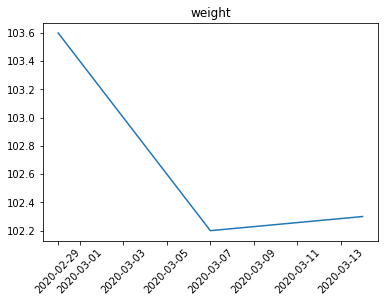

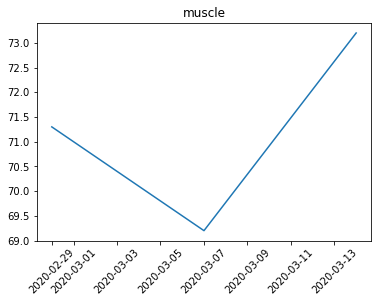

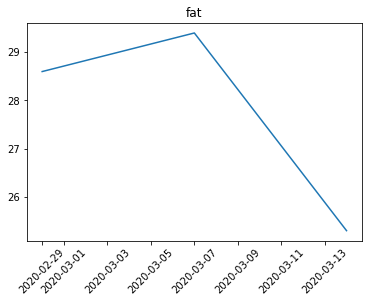

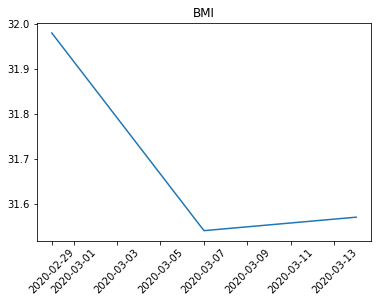

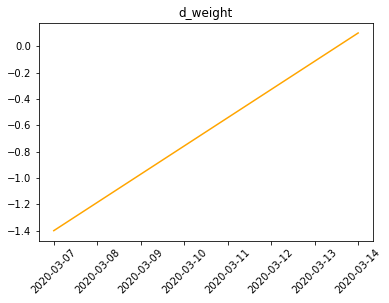

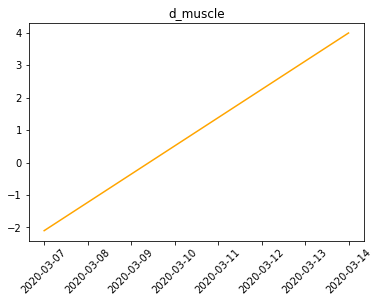

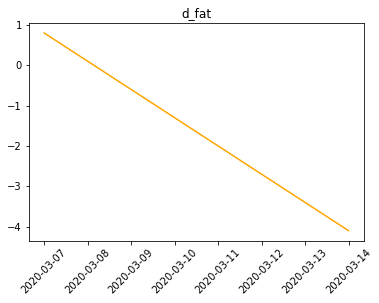

In [7]:
dataKey = mapKey(data)
keys = ["weight", "muscle","fat","BMI"]
for k in keys:
    plt.plot(dataKey("date"),dataKey(k))
    plt.title(k)
    plt.xticks(rotation=45)
    plt.show()


deltasKey = mapKey(deltas)
keys = ["d_weight", "d_muscle","d_fat",]
for k in keys:
    plt.plot(deltasKey("date"),deltasKey(k), color="orange")
    plt.title(k)
    plt.xticks(rotation=45)
    plt.show()